Link to dataset: https://www.kaggle.com/code/richieone13/a-b-testing-example/data

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [28]:
len(df)

294478

In [14]:
N_cont=df[df['group']=='control']['group'].count()
N_exp=df[df['group']=='treatment']['group'].count()
print('Control group:',N_cont)
print('Treatment group:',N_exp)

Control group: 147202
Treatment group: 147276


In [15]:
#conversion rate for control group
X_cont= df[(df['group']=='control')&(df['converted']==1)]['converted'].count()
X_exp= df[(df['group']=='treatment')&(df['converted']==1)]['converted'].count()

In [20]:
p_hat_cont=X_cont/N_cont
p_hat_exp=X_exp/N_exp
print(p_hat_cont,p_hat_exp)

0.12039917935897611 0.11891957956489856


Alpha=0.05
Z(0.95)=1.96

Hypothesis testing: 
H0:No difference (d=0)
Ha:There is a significant difference

Rejection rule:
    Reject null, if d_hat>1.96*SE_pool or d_hat<-1.96*SE_pool

# Select the number of samples

Link: https://www.evanmiller.org/ab-testing/sample-size.html
        
Baseline conversion rate:12% (estimated click-through probability before making the change ie., p_hat_cont)
Minimum Detectable Effect:2% (practical significance level d_min)
alpha=5%
beta=20%
statistical power=1-beta=80%
Sample size= 4,230

In [ ]:
alpha =0.05  #5%
beta = 0.2 # statistical power=80% which is 1-beta=0.8
d_min=0.02 # practical significance which is 2%


In [23]:
import statistics
import math
P_hat_pool=(X_cont+X_exp)/(N_cont+N_exp)
SE_pool=math.sqrt(P_hat_pool*(1-P_hat_pool)*((1/N_cont)+(1/N_exp)))
d_hat=p_hat_cont-p_hat_exp
d_hat

0.0014795997940775518

In [27]:
ME=1.96*SE_pool   #ME=Margin of error
print(ME)
Lower_limit=d_hat-ME
Upper_limit=d_hat+ME
print(Lower_limit,Upper_limit)

0.0023445424783720015
-0.0008649426842944497 0.0038241422724495534


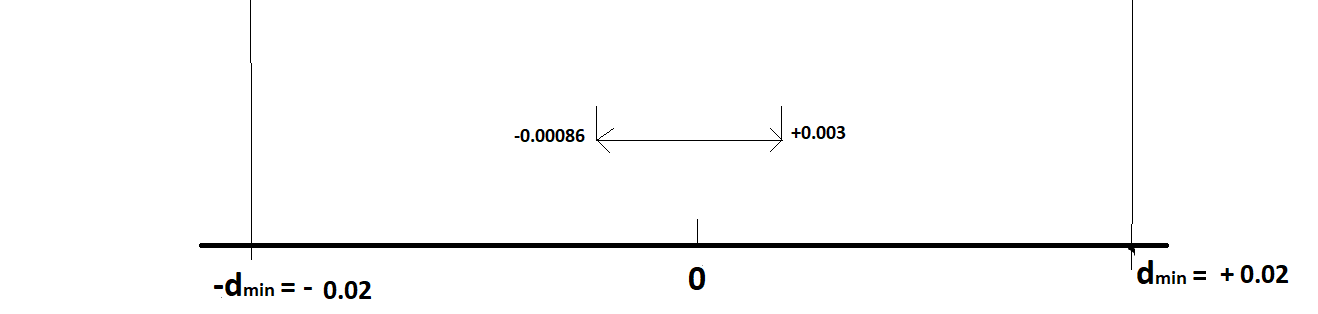

Would you launch the change?
No, Because the upper and lower limit range(-0.00086,+0.0038) are within the practical signifant level(-0.02,+0.02). 
So there is no effect of the experiment group on the convertion rate.